# Point-Spread Function

This report computes the point-spread function of the ESIS optical system.

In [1]:
import matplotlib.pyplot as plt
import astropy.visualization
import astropy.units as u
import named_arrays as na
import esis


Start by loading the proposed optical design

In [2]:
instrument = esis.flights.f1.optics.design_single(num_distribution=0)
instrument.field.num = 5
# spectrograph.pupil.num = 21

Plot a schematic of the spectrograph design

/home/runner/.local/lib/python3.12/site-packages/astropy/units/quantity.py:659: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


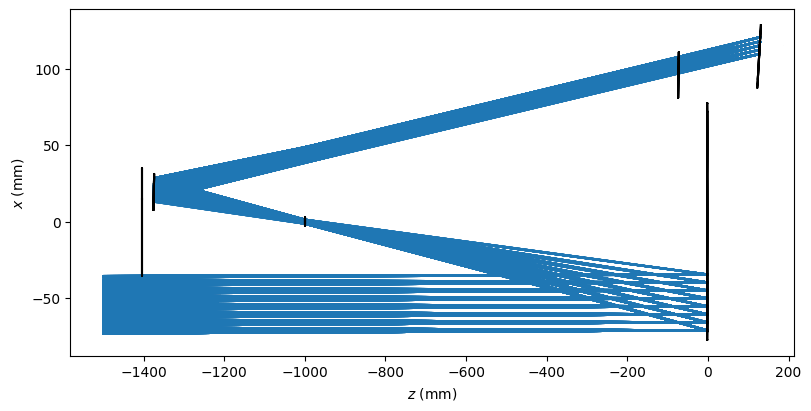

In [3]:
with astropy.visualization.quantity_support():
    fig, ax = plt.subplots(
        figsize=(8, 4),
        constrained_layout=True,
    )
    instrument.system.plot(
        ax=ax,
        # plot_rays=False,
        components=("z", "x"),
        color="black",
        # plot_rays_vignetted=True,
        kwargs_rays=dict(
            color="tab:blue",
            zorder=0,
        ),
    )
    ax.set_xlabel(f"$z$ ({ax.get_xlabel()})")
    ax.set_ylabel(f"$x$ ({ax.get_ylabel()})")
    # ax.set_aspect("equal")

Plot a spot diagram for the nominal wavelength

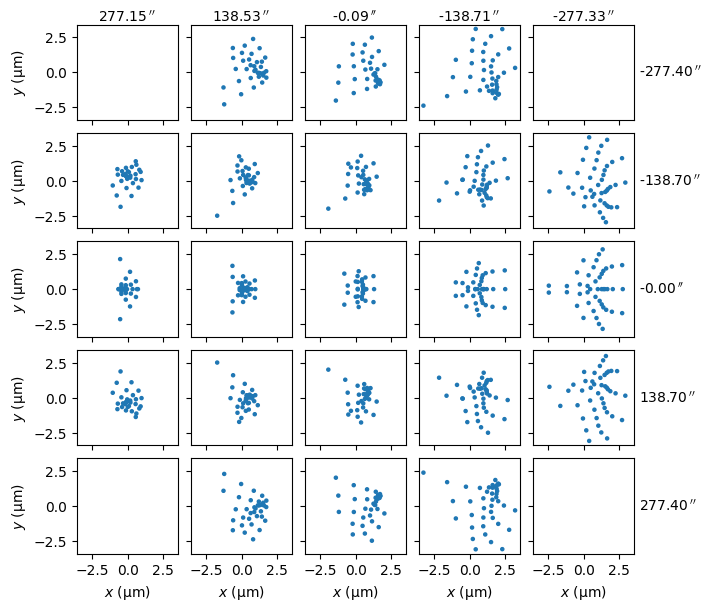

In [4]:
field = instrument.field

rays = instrument.system.rayfunction_default.outputs
position = rays.position.to(u.um)
position_relative = position - position.mean(instrument.pupil.axes)

with astropy.visualization.quantity_support():
    fig, ax = na.plt.subplots(
        axis_rows=field.axis.y,
        axis_cols=field.axis.x,
        nrows=field.num,
        ncols=field.num,
        sharex=True,
        sharey=True,
        figsize=(7, 6),
        constrained_layout=True,
    )
    na.plt.scatter(
        position_relative.x,
        position_relative.y,
        ax=ax,
        s=5,
        where=rays.unvignetted,
    )

    ax_lower = ax[{field.axis.y: +0}]
    ax_upper = ax[{field.axis.y: ~0}]
    ax_left = ax[{field.axis.x: +0}]
    ax_right = ax[{field.axis.x: ~0}]

    na.plt.set_xlabel(f"$x$ ({position.x.unit:latex_inline})", ax=ax_lower)
    na.plt.set_ylabel(f"$y$ ({position.y.unit:latex_inline})", ax=ax_left)

    angle = instrument.system.rayfunction_default.inputs.field.to(u.arcsec)
    angle_x = angle.x.mean(set(angle.axes) - {field.axis.x,})
    angle_y = angle.y.mean(set(angle.axes) - {field.axis.y,})
    na.plt.text(
        x=0.5,
        y=1,
        s=angle_x.nominal.to_string_array(),
        ax=ax_upper,
        transform=na.plt.transAxes(ax_upper),
        ha="center",
        va="bottom",
    )
    na.plt.text(
        x=1.05,
        y=0.5,
        s=angle_y.nominal.to_string_array(),
        ax=ax_right,
        transform=na.plt.transAxes(ax_right),
        ha="left",
        va="center",
    )